In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Timestamp,Gender,Age,Student's home address type,Family size,Parent's cohabitation status,Mother's education,Father's education,Mother job,Father job,...,With a romantic relationship,Quality of family relationships,Free time after school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,Number of school absences,How often do you visit the library,What is your current CGPA?(eg. 2.36)
0,2019/07/02 11:30:20 AM GMT+1,Female,18-25,Urban,3-6,Living Together,Higher Education,Higher Eductaion,Business,Computer Engineer.,...,No,10,5,1,0,0,10,0-25%,5,4.08
1,2019/07/02 11:49:01 AM GMT+1,Male,18-25,Urban,1-3,Apart,Higher Education,Higher Eductaion,Business,Civil services(e.g. administrative or police),...,No,3,6,9,9,9,10,0-25%,7,2.37
2,2019/07/02 12:33:29 PM GMT+1,Female,18-25,Urban,3-6,Living Together,Higher Education,Higher Eductaion,Teacher,Retired,...,No,2,0,5,0,0,10,0-25%,1,4.89
3,2019/07/02 12:49:27 PM GMT+1,Male,18-25,Urban,3-6,Living Together,Higher Education,Higher Eductaion,Civil services(e.g. administrative or police),Teacher,...,Yes,4,1,0,0,0,10,0-25%,5,3.56
4,2019/07/02 12:58:20 PM GMT+1,Male,18-25,Urban,3-6,Living Together,Higher Education,Higher Eductaion,Business,Business,...,No,6,5,6,0,0,10,0-25%,4,5.00


In [4]:
#df["Number of school absences"].value_counts()

In [5]:
df.rename(columns={"Student's home address type":"Address", "Family size":"Family_size", " Parent's cohabitation status":"Parent_status", "Mother's education":"mother_education", "Father's education":"father_education", "Mother job":"mother_job", "Father job":"father_job", "Reason to choose your current school":"reason", "student's guardian":"guardian", "weekly study time":"weekly_study_time", "Number of past class failures":"failures", "Extra educational support":"schoolsup", "Family educational support":"famsup", "Extra paid classes within the course subject":"extra_paid_class", "Extra-curricular activities":"activities", "Attended nursery school":"nursery", "Internet access at home":"internet", "With a romantic relationship":"romantic", "Quality of family relationships":"family_quality", "Free time after school":"free_time", "Going out with friends":"go_out", "Workday alcohol consumption":"workday_alcohol_usage", "Weekend alcohol consumption":"weekend_alcohol_usage", "Current health status":"health", "Number of school absences":"absences", "How often do you visit the library":"library", "What is your current CGPA?(eg. 2.36)":"CGPA"}, inplace=True)

In [6]:
for col in df.columns:
    if df[col].dtypes == 'object':
        num_of_unique_cat = len(df[col].unique())
        print("feature '{col_name}' has '{unique_cat}' unique categories".format(col_name = col, unique_cat=num_of_unique_cat))

feature 'Timestamp' has '222' unique categories
feature 'Gender' has '2' unique categories
feature 'Age' has '3' unique categories
feature 'Address' has '4' unique categories
feature 'Family_size' has '3' unique categories
feature 'Parent_status' has '2' unique categories
feature 'mother_education' has '4' unique categories
feature 'father_education' has '4' unique categories
feature 'mother_job' has '6' unique categories
feature 'father_job' has '9' unique categories
feature 'reason' has '7' unique categories
feature 'guardian' has '7' unique categories
feature 'weekly_study_time' has '3' unique categories
feature 'failures' has '4' unique categories
feature 'schoolsup' has '2' unique categories
feature 'famsup' has '2' unique categories
feature 'extra_paid_class' has '2' unique categories
feature 'activities' has '2' unique categories
feature 'nursery' has '2' unique categories
feature 'internet' has '2' unique categories
feature 'romantic' has '2' unique categories
feature 'absences

In [7]:
#df['Gender'] = df['Gender'].map( {'Male':'M', 'Female':'F'} )
#df["Student's home address type"] = df["Student's home address type"].map( {'Abroad':'U', 'Out':'U', 'Urban':'U', 'Rural':'R'})
#df['Family size'] = df['Family size'].map( {'3-6':'GT3', '1-3':'LE3', '6 and above':'GT3'} )
#df["Parent's cohabitation status"] = df["Parent's cohabitation status"].map( {'Living Together':'T', 'Apart':'A'} )
df["mother_education"] = df["mother_education"].map( {'None':0, 'Primary':1, 'Secondary':2, 'Higher Education':3})
df["father_education"] = df["father_education"].map( {'None':0, 'Primary':1, 'Secondary':2, 'Higher Education':3})
df["weekly_study_time"] = df["weekly_study_time"].map( {'1-2Hrs':1, '2-5Hrs':2, '5-10Hrs':3})
df["failures"] = df["failures"].map( {'None':'0', '1-3':1, '3-5':2, '15':3})


In [8]:
#df.head()

In [9]:
df['CGPA'] = df['CGPA'].astype(float)

In [10]:
bins = [0.0, 1.0, 1.50, 2.40, 3.50, 4.50, 5.0]
labels = ['Fail', 'Pass', '3rd class', '2nd class lower', '2nd class upper', '1st class']
df['grade'] = pd.cut(df['CGPA'], bins=bins, labels=labels)

In [11]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Address', 'Family_size', 'Parent_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'weekly_study_time', 'failures', 'schoolsup',
       'famsup', 'extra_paid_class', 'activities', 'nursery', 'internet',
       'romantic', 'family_quality', 'free_time', 'go_out',
       'workday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences',
       'library', 'CGPA', 'grade'],
      dtype='object')

In [12]:
df.head()

,Timestamp,Gender,Age,Address,Family_size,Parent_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,workday_alcohol_usage,weekend_alcohol_usage,health,absences,library,CGPA,grade
0,2019/07/02 11:30:20 AM GMT+1,Female,18-25,Urban,3-6,Living Together,3,NaN,Business,Computer Engineer.,...,10,5,1,0,0,10,0-25%,5,4.08,2nd class upper
1,2019/07/02 11:49:01 AM GMT+1,Male,18-25,Urban,1-3,Apart,3,NaN,Business,Civil services(e.g. administrative or police),...,3,6,9,9,9,10,0-25%,7,2.37,3rd class
2,2019/07/02 12:33:29 PM GMT+1,Female,18-25,Urban,3-6,Living Together,3,NaN,Teacher,Retired,...,2,0,5,0,0,10,0-25%,1,4.89,1st class
3,2019/07/02 12:49:27 PM GMT+1,Male,18-25,Urban,3-6,Living Together,3,NaN,Civil services(e.g. administrative or police),Teacher,...,4,1,0,0,0,10,0-25%,5,3.56,2nd class upper
4,2019/07/02 12:58:20 PM GMT+1,Male,18-25,Urban,3-6,Living Together,3,NaN,Business,Business,...,6,5,6,0,0,10,0-25%,4,5.00,1st class


In [13]:
df[["nursery","extra_paid_class", "famsup"]].head(3)

,nursery,extra_paid_class,famsup
0,Yes,No,Yes
1,Yes,No,No
2,No,No,Yes


In [14]:
nu=pd.get_dummies(df["nursery"], drop_first=True)

In [15]:
inte=pd.get_dummies(df["internet"], drop_first=True)

In [16]:
df_new=pd.concat([df,inte],axis=1)
df_new.drop(columns="internet", axis=1, inplace =True)

In [17]:
df_new.rename({"Yes":"internet"},axis=1, inplace=True)

In [18]:
dfn1=pd.concat([df_new,nu], axis=1 )

In [19]:
dfn1.drop(labels="nursery", axis=1, inplace=True)

In [20]:
dfn1.rename({"Yes":"nursery"},axis=1, inplace=True)

In [21]:
ep=pd.get_dummies(df["extra_paid_class"], drop_first=True)

In [22]:
dfn2=pd.concat([dfn1,ep], axis=1)

In [23]:
dfn2.rename({"Yes":"tutorial"},axis=1, inplace=True)

In [24]:
fs=pd.get_dummies(df["famsup"], drop_first=True)

In [25]:
dfn3=pd.concat([dfn2,fs], axis=1)

In [26]:
dfn3.rename({"Yes":"fam_sup"},axis=1, inplace=True)

In [27]:
dfn3.drop(labels="fam_sup", axis=1, inplace=True)

In [28]:
dfn3.head(2)

,Timestamp,Gender,Age,Address,Family_size,Parent_status,mother_education,father_education,mother_job,father_job,...,workday_alcohol_usage,weekend_alcohol_usage,health,absences,library,CGPA,grade,internet,nursery,tutorial
0,2019/07/02 11:30:20 AM GMT+1,Female,18-25,Urban,3-6,Living Together,3,NaN,Business,Computer Engineer.,...,0,0,10,0-25%,5,4.08,2nd class upper,1,1,0
1,2019/07/02 11:49:01 AM GMT+1,Male,18-25,Urban,1-3,Apart,3,NaN,Business,Civil services(e.g. administrative or police),...,9,9,10,0-25%,7,2.37,3rd class,1,1,0


In [29]:
X_1 = dfn3[["internet","mother_education","free_time","go_out","library","family_quality","workday_alcohol_usage","weekend_alcohol_usage","health","nursery","tutorial"]]#,"tutorial","fam_sup"]]
y=dfn3["CGPA"]

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler().fit(X_1)

C:\Users\User\Anaconda1\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [32]:
scaled_f=sc.transform(X_1)

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [33]:
df_x=pd.DataFrame(scaled_f, columns=X_1.columns)

In [34]:
X=df_x

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
pred=lm.predict(X_test)

In [41]:
pred

array([2.72275964, 4.63809754, 3.46607355, 3.52370073, 3.07554514,
       2.76935405, 2.92739331, 3.36583936, 4.7470552 , 3.48162393,
       2.8006066 , 3.8773631 , 4.3860695 , 3.87320962, 2.58812089,
       1.646228  , 2.68504653, 4.83430237, 3.70166688, 4.57696466,
       2.10224733, 2.63197651, 4.82293908, 4.02949114, 4.83430237,
       3.13653603, 2.14682164, 3.77166772, 3.44889501, 3.80005212,
       2.85666977, 3.85090491, 4.71392532, 4.92843636])

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [43]:
print(explained_variance_score(y_test,pred))

0.7487131930715706


In [309]:
dfn3[dfn3["CGPA"]==5.0]["family_quality"]

4       6
31      5
43      6
48     10
51      6
65      5
83     10
117     7
127     7
133     5
Name: family_quality, dtype: int64

C:\Users\User\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


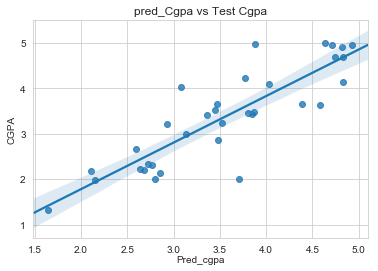

<Figure size 720x720 with 0 Axes>

In [253]:
sns.regplot(pred,y_test, marker="o")
plt.xlabel("Pred_cgpa",labelpad=True)
plt.title("pred_Cgpa vs Test Cgpa")
plt.figure(figsize=(10,10))
plt.show()

Text(0, 0.5, 'Density')

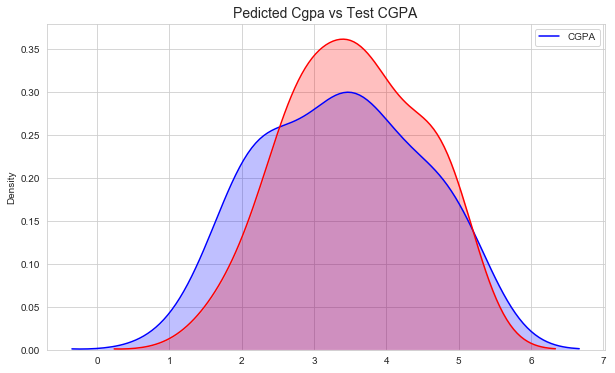

In [254]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_test, shade=True,color="b" )
sns.kdeplot(pred, shade=True,color="r" )
plt.title("Pedicted Cgpa vs Test CGPA", fontsize=(14))
plt.ylabel("Density", fontsize=(10))

EDA

Text(0, 0.5, 'Number of Student')

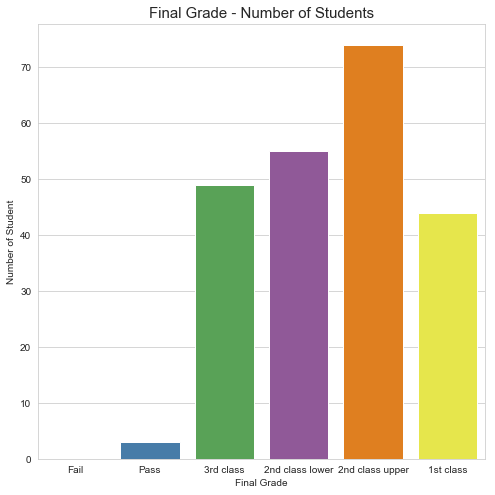

In [255]:
plt.figure(figsize=(8,8))
sns.countplot(dfn3.grade, order=['Fail', 'Pass', '3rd class', '2nd class lower', '2nd class upper', '1st class'], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=15)
plt.xlabel('Final Grade', fontsize=10)
plt.ylabel('Number of Student', fontsize=10)

Text(0.5, 1.0, 'Correlation Heatmap')

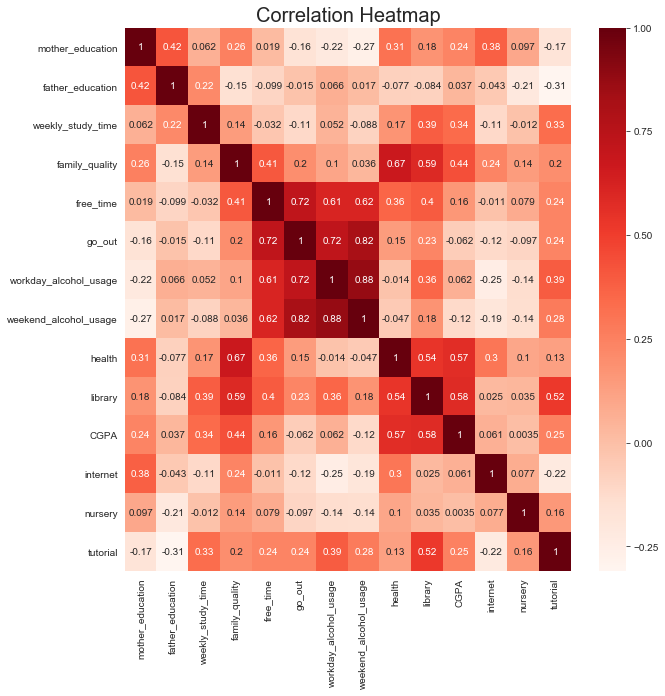

In [256]:
# see correlation between variables through a correlation heatmap
corr = dfn3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [162]:
perc = (lambda col: col/col.sum())
index = ['Fail', 'Pass', '3rd class', '2nd class lower', '2nd class upper', '1st class']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

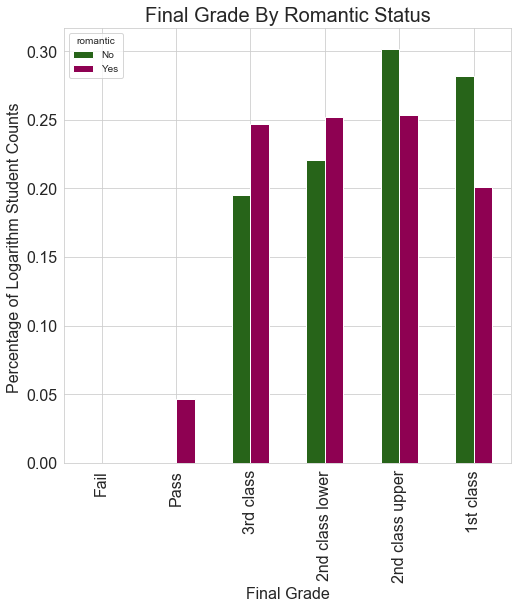

In [163]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [164]:
alc_tab1 = pd.crosstab(index=df.grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted

Text(0.5, 0, 'Level of Alcohol Consumption')

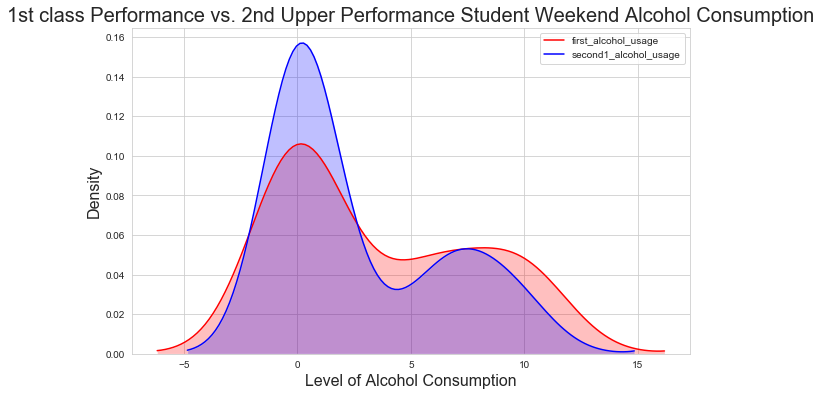

In [165]:
# create first class student dataframe
first = df.loc[df.grade == '1st class']
first['first_alcohol_usage']=first.weekend_alcohol_usage
# create 2nd class upper student dataframe
second1 = df.loc[df.grade == '2nd class upper']
second1['second1_alcohol_usage']=second1.weekend_alcohol_usage
# create 2nd class lower student dataframe
#second2 = df.loc[df.grade == '2nd class lower']
#second2['second2_alcohol_usage']=second2.weekend_alcohol_usage
# create third class student dataframe
#third = df.loc[df.grade == '3rd class']
#third['first_alcohol_usage']=third.weekend_alcohol_usage
# create pass class student dataframe
#pass1 = df.loc[df.grade == 'Pass']
#pass1['pass_alcohol_usage']=pass1.weekend_alcohol_usage
# create pass class student dataframe
#fail = df.loc[df.grade == 'Fail']
#fail['fail_alcohol_usage']=fail.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(first['first_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(second1['second1_alcohol_usage'], shade=True, color="b")
plt.title('1st class Performance vs. 2nd Upper Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Text(0.5, 0, 'Level of Alcohol Consumption')

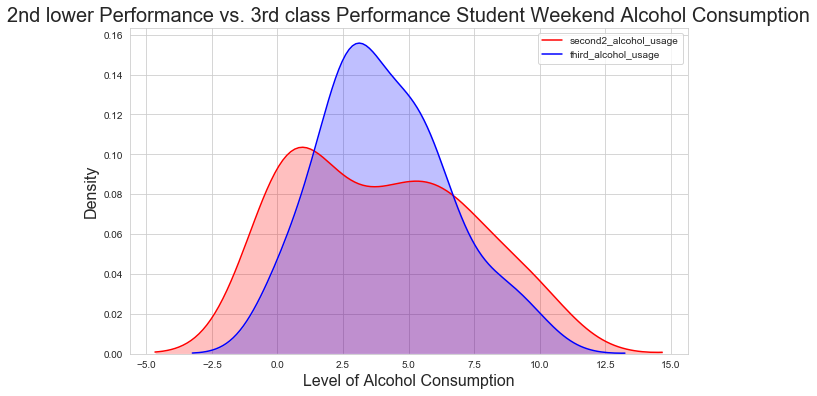

In [166]:
# create 2nd class lower student dataframe
second2 = df.loc[df.grade == '2nd class lower']
second2['second2_alcohol_usage']=second2.weekend_alcohol_usage
# create third class student dataframe
third = df.loc[df.grade == '3rd class']
third['third_alcohol_usage']=third.weekend_alcohol_usage
# create pass class student dataframe
pass1 = df.loc[df.grade == 'Pass']
pass1['pass_alcohol_usage']=pass1.weekend_alcohol_usage
# create pass class student dataframe
fail = df.loc[df.grade == 'Fail']
fail['fail_alcohol_usage']=fail.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(second2['second2_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(third['third_alcohol_usage'], shade=True, color="b")
plt.title('2nd lower Performance vs. 3rd class Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 0, 'Level of Alcohol Consumption')

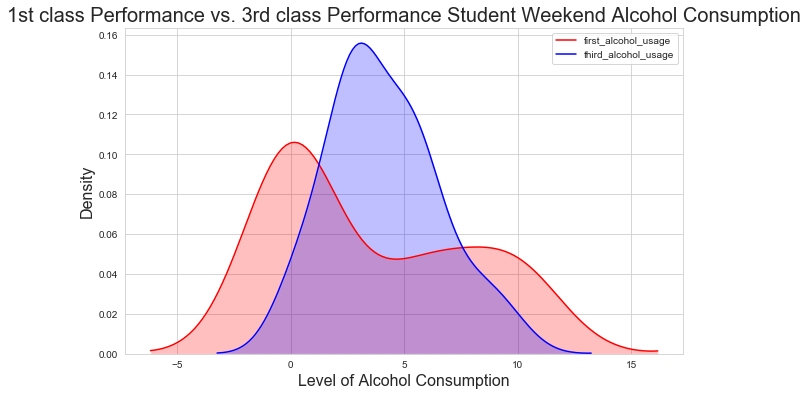

In [167]:
# create first class student dataframe
first = df.loc[df.grade == '1st class']
first['first_alcohol_usage']=first.weekend_alcohol_usage

# create third class student dataframe
third = df.loc[df.grade == '3rd class']
third['third_alcohol_usage']=third.weekend_alcohol_usage


plt.figure(figsize=(10,6))
p1=sns.kdeplot(first['first_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(third['third_alcohol_usage'], shade=True, color="b")
plt.title('1st class Performance vs. 3rd class Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

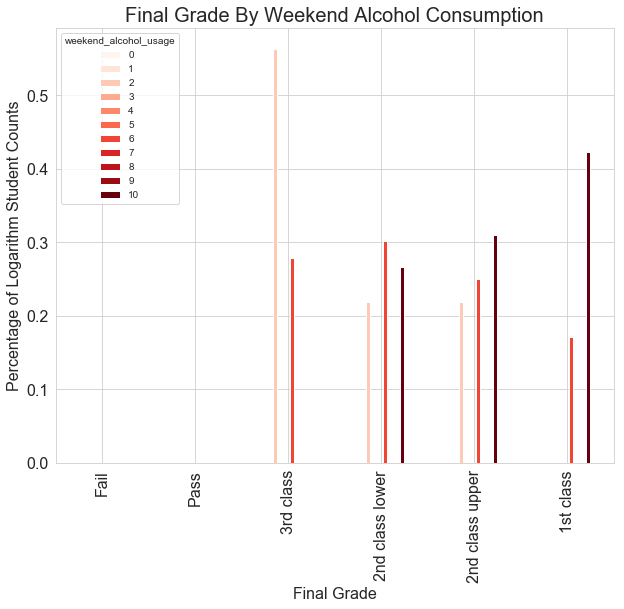

In [168]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [169]:
first['1st_student_father_education'] = first.father_education
second1['21_student_father_education'] = second1.father_education
second2['22_student_father_education'] = second2.father_education
third['3rd_student_father_education'] = third.father_education
pass1['pass_student_father_education'] = pass1.father_education
fail['fail_student_father_education'] = fail.father_education

first['1st_student_mother_education'] = first.mother_education
second1['21_student_mother_education'] = second1.mother_education
second2['22_student_mother_education'] = second2.mother_education
third['3rd_student_mother_education'] = third.mother_education
pass1['pass_student_mother_education'] = pass1.mother_education
fail['fail_student_mother_education'] = fail.mother_education

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

C:\Users\User\Anaconda1\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda1\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda1\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\User\Anaconda1\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\Anaconda1\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\User\Anaconda1\lib\site-packages\numpy\core\fromnumeric.py:83: Runtim

Text(0.5, 0, 'Father Education Level')

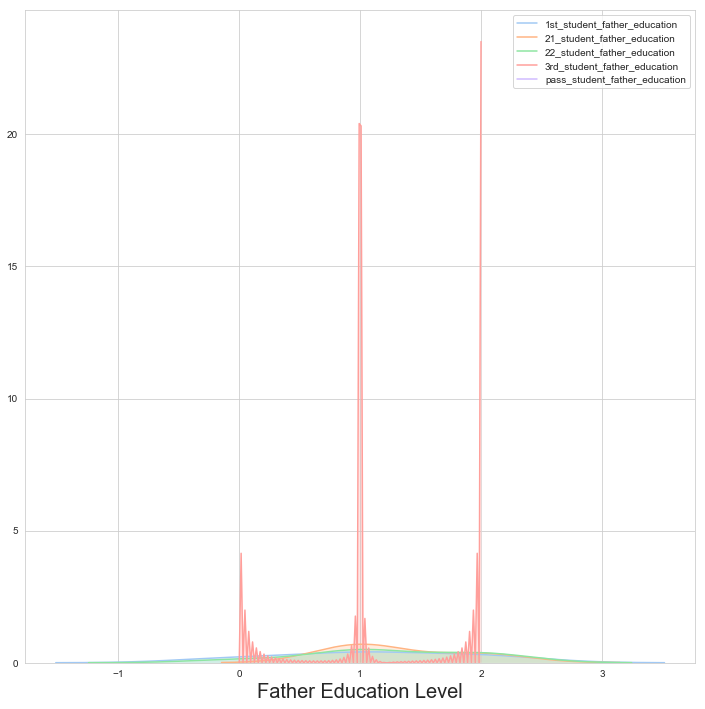

In [170]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(12,12))
p2=sns.kdeplot(first['1st_student_father_education'], shade=True)
p2=sns.kdeplot(second1['21_student_father_education'], shade=True)
p2=sns.kdeplot(second2['22_student_father_education'], shade=True)
p2=sns.kdeplot(third['3rd_student_father_education'], shade=True)
p2=sns.kdeplot(pass1['pass_student_father_education'], shade=True)
p2=sns.kdeplot(fail['fail_student_father_education'], shade=True)
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

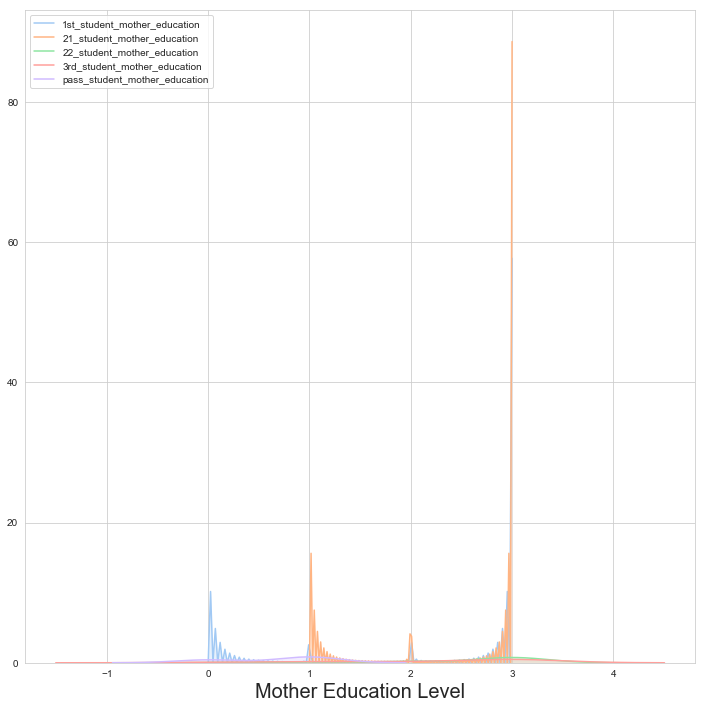

In [171]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(12,12))
p2=sns.kdeplot(first['1st_student_mother_education'], shade=True)
p2=sns.kdeplot(second1['21_student_mother_education'], shade=True)
p2=sns.kdeplot(second2['22_student_mother_education'], shade=True)
p2=sns.kdeplot(third['3rd_student_mother_education'], shade=True)
p2=sns.kdeplot(pass1['pass_student_mother_education'], shade=True)
p2=sns.kdeplot(fail['fail_student_mother_education'], shade=True)
plt.xlabel('Mother Education Level', fontsize=20)

In [172]:
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.CGPA
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

C:\Users\User\Anaconda1\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\User\Anaconda1\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans

Text(0.5, 0, 'Frequency of Going Out')

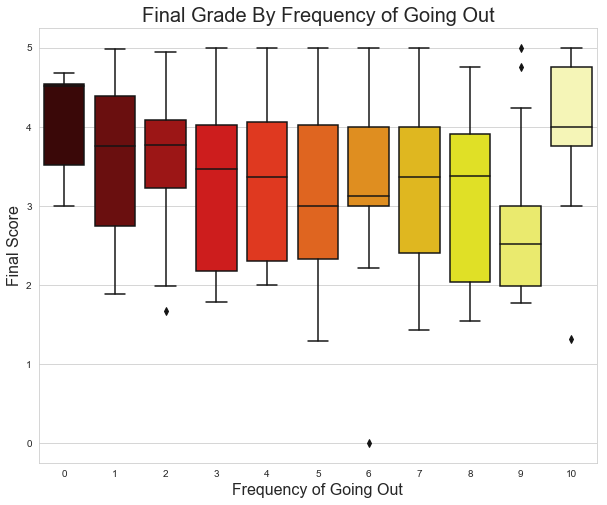

In [173]:

# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(10,8))
sns.boxplot(x='go_out', y='CGPA', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

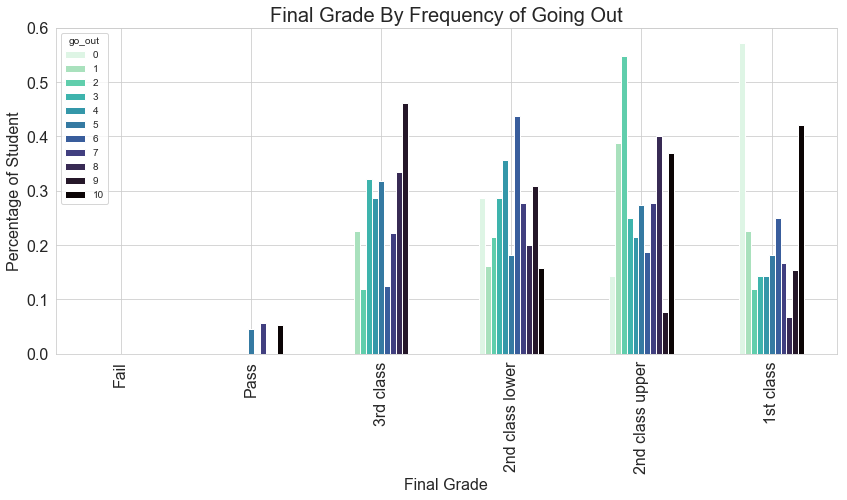

In [174]:
out_tab = pd.crosstab(index=df.grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [175]:

# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

0.2352429628360504

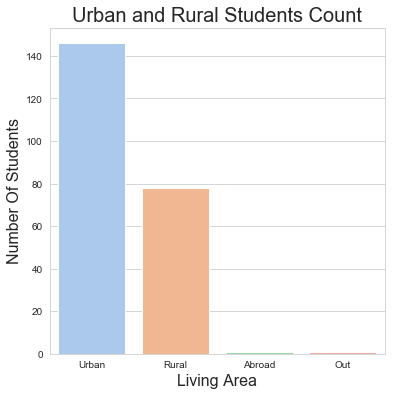

In [176]:
plt.figure(figsize=(6,6))
sns.set_palette("pastel")
sns.countplot(df.Address)
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [177]:
ad_tab1 = pd.crosstab(index=df.grade, columns=df.Address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

C:\Users\User\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 0, 'Final Grade')

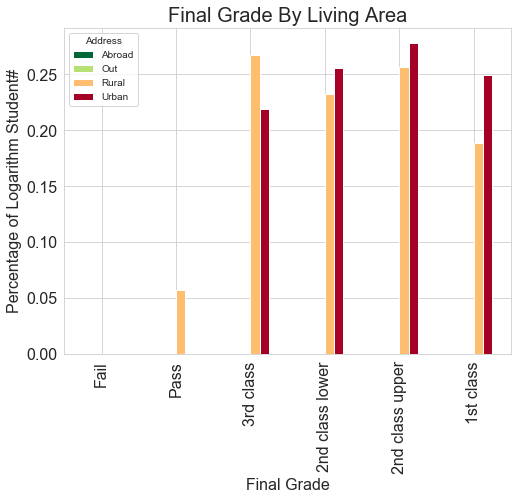

In [178]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [179]:

# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.0766174934352356

In [180]:
dfd = df.copy()
dfd = dfd.drop([ 'CGPA'], axis=1)

In [181]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.grade = le.fit_transform(dfd.grade)

TypeError: '<' not supported between instances of 'str' and 'float'

In [182]:
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

ValueError: Unknown label type: 'continuous'

C:\Users\User\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda1\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda1\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


TypeError: 1 is not a string

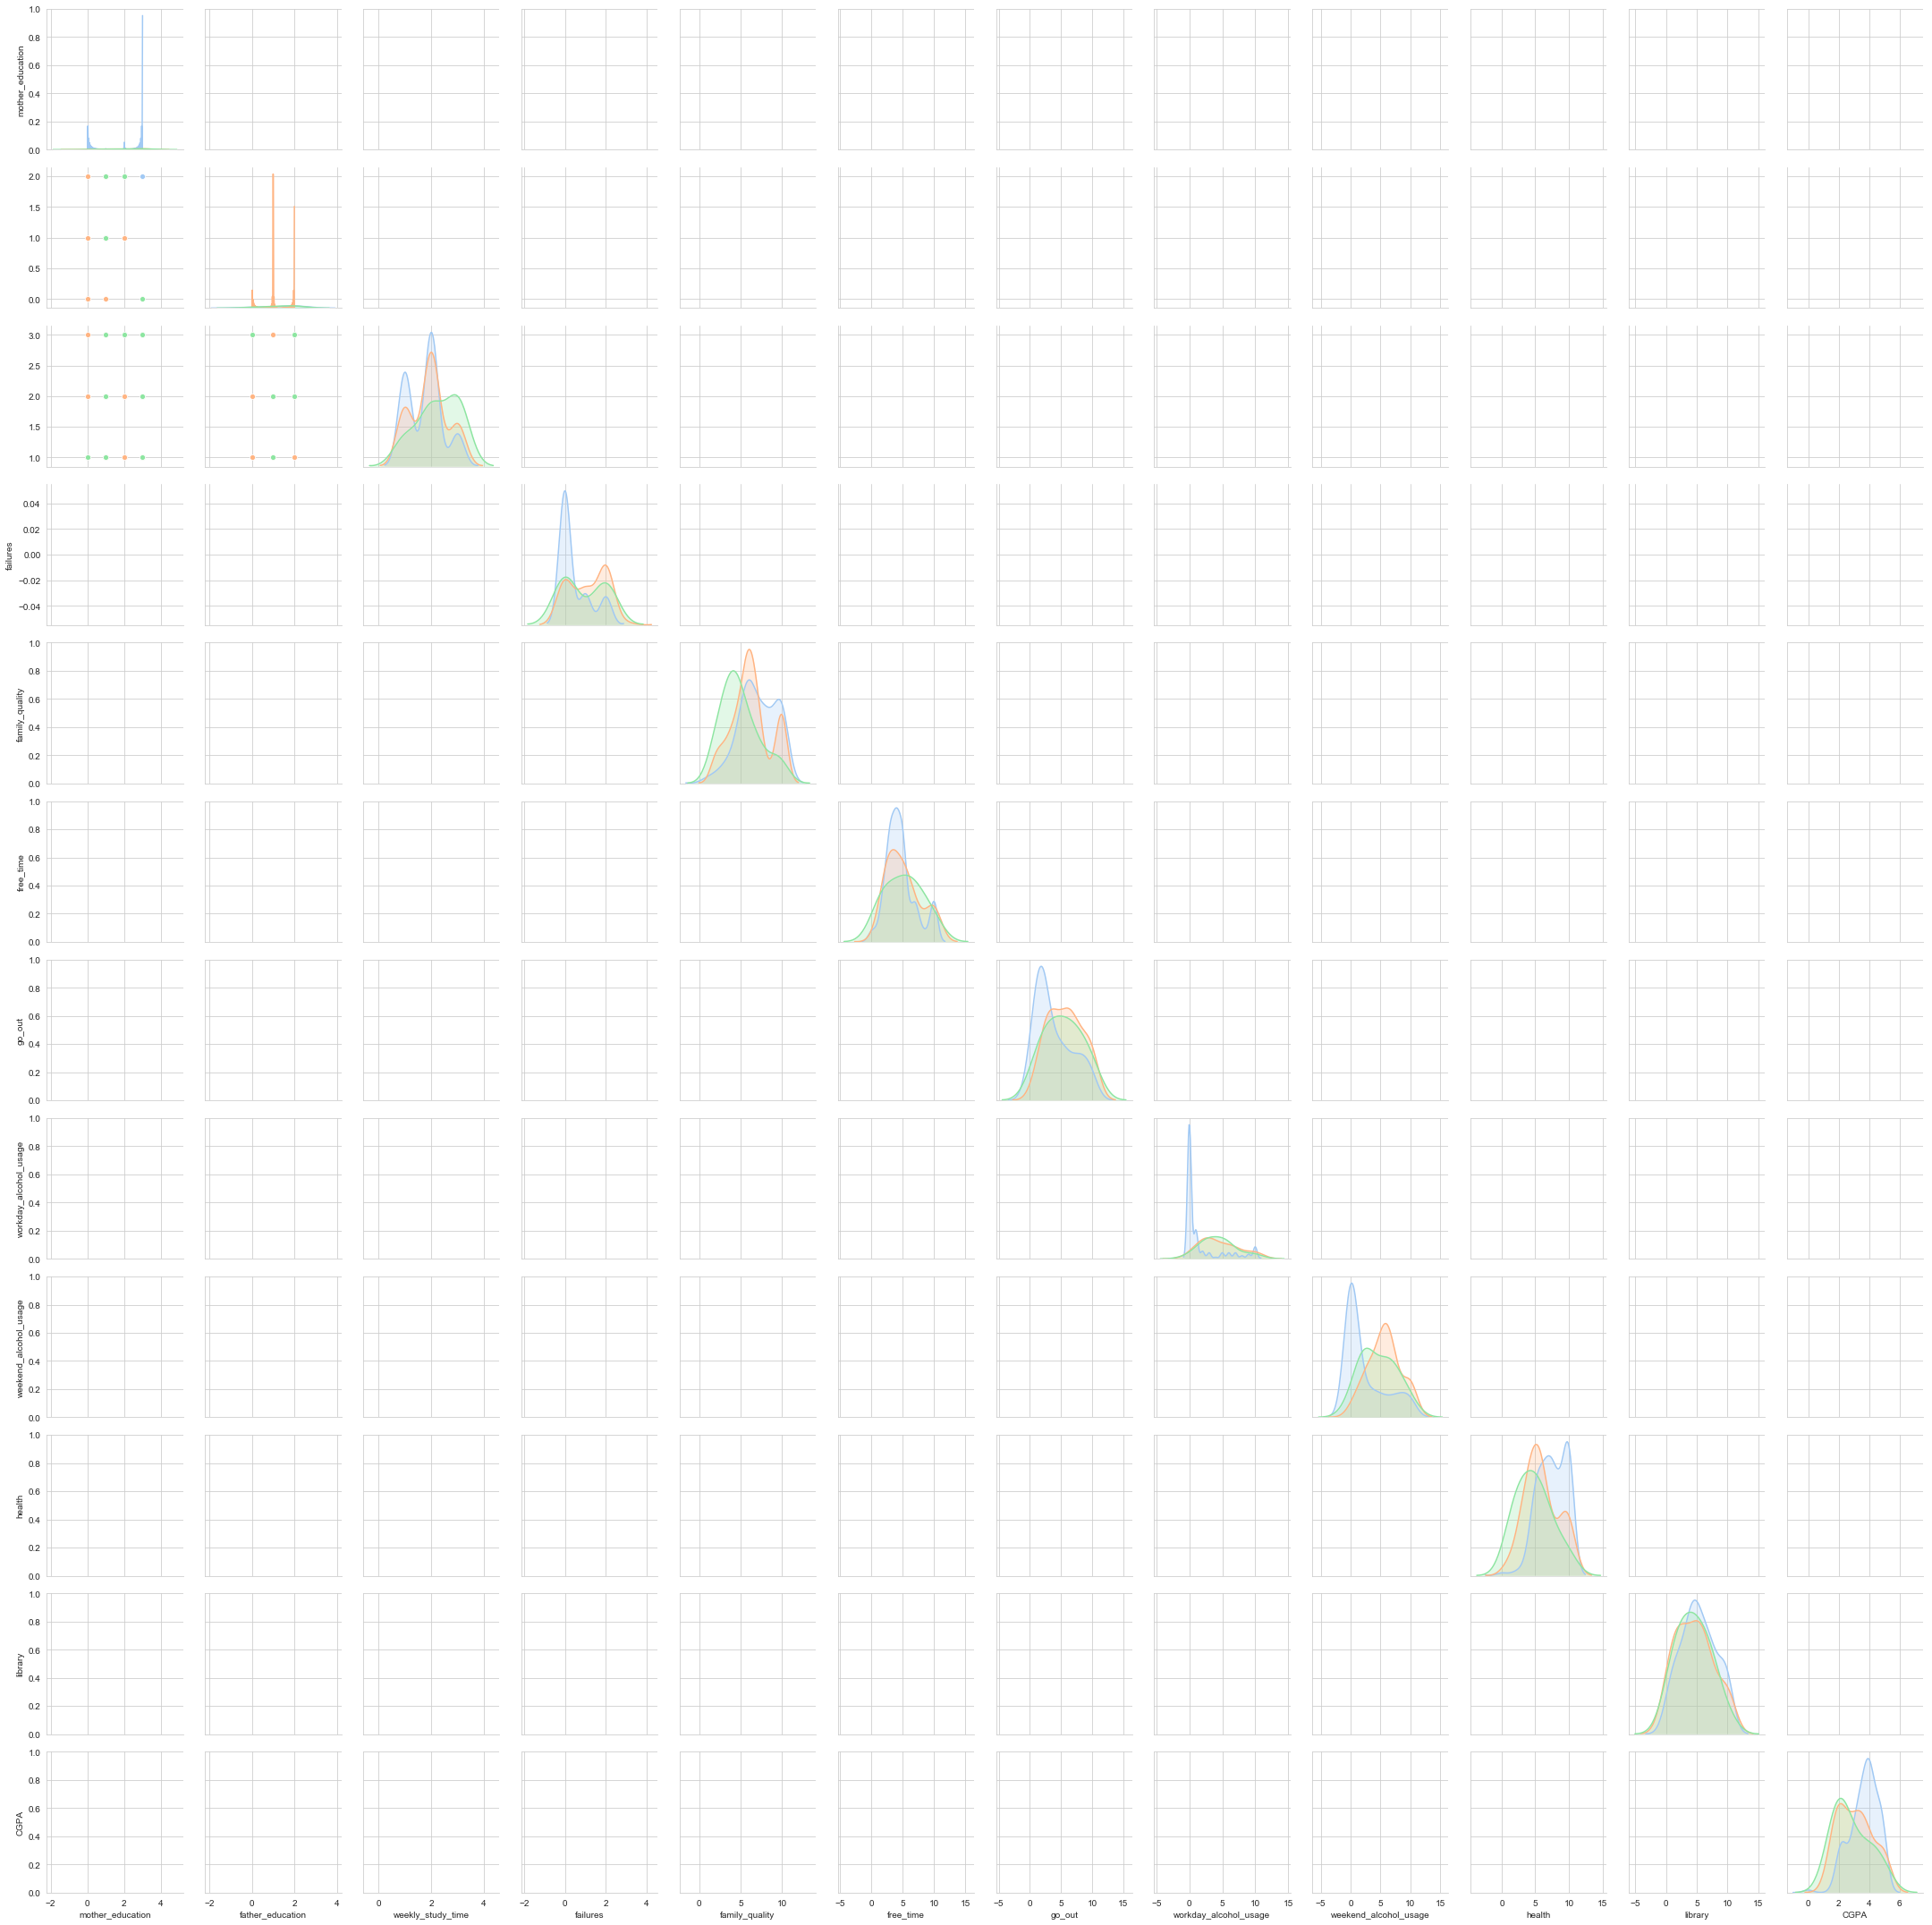

In [183]:
sns.pairplot(df, hue="absences")